## DS-MM Exam II

## **Tim Staubert**

# Are developed countries worse for the global environment?

## Introduction

The first part of this analysis aims to identify clusters of countries regarding their impact on the global environment. In the second part, a clustering will be made regarding the overall development of the analysed countries. The goal of this procedure is to see whether the resulting clusterings are similar. This would then be an indicator for a correlation between the overall development of a country and its impact on the environment - a correlation that I personally believe in, but without ever having looked at some actual data.   
Furthermore, if my initial thesis holds up, it might be possible with this analysis to identify countries that are very developed and still do not have such a negative influence on the global environment as equally developed countries. A qualitative analysis could then look deeper into how those countries have managed to balance their environmental impact and their development.

## Data acquisition and cleaning

To build a data model for the following analysis, I rely on data from the open data portal worldbank.org. The features on which the clustering will be performed on, are, in both cases, handpicked from the list of available indicators at data.worldbank.org/indicator. Through my bachelors study program, I have a brief understanding in the domain of climate physics, but to improve the quality of an analysis like this, the selected features would have to be discussed by domain experts. But since this work is only used as an example on how to handle some technical aspects of clustering, I am content to select my features like this. 

For (almost) all analysed features, values from the year 2014 will be analysed, as more recent values are not available for all features.

#### Features for impact on environment

In the following section, a 12 dimensional feature space with these features will be created to represent a countries influence on the envronment:

- Agricultural land (% of land area)
- Fertilizer cosumption (kilograms per hectare of arable land)
- Forest area (% of land area)
- CO2 emissions (metric tons per capita)   
- Electric power consumption (kWh per capita)  
- Renewable electrcity output (% of total electricity output)  
- Terrestrial and marine protected areas (% of total territorial area) 
- Fossil fuel energy consumption (% of total)  
- Energy use (kg of oil equivalent per capita) 
- PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) 
- Total natural resources rents (% of GDP) 
- Population density (people per sq. km of land area) 

By design, these are all relative values that are (almost) independent on the absolute size of a country and its population.

In [171]:

## CREATE THE DATAFRAME FOR IMPACT ON ENVIRONMENT ##

import requests
import pandas as pd

indicators = ['AG.LND.AGRI.ZS', 'AG.CON.FERT.ZS', 'AG.LND.FRST.ZS', 'EN.ATM.CO2E.PC', 'EG.USE.ELEC.KH.PC', 'EG.ELC.RNEW.ZS', 'ER.PTD.TOTL.ZS', 'EG.USE.COMM.FO.ZS', 'EG.USE.PCAP.KG.OE', 'EN.ATM.PM25.MC.M3', 'NY.GDP.TOTL.RT.ZS', 'EN.POP.DNST']

# Creating the base dataframe that additional data gets iteratively joined on
base_response = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2014&per_page=9999&format=json')
base_data = pd.json_normalize(base_response.json()[1])
base_data = base_data[base_data.index > 48] # This is to cut of all instances that represent accumulated values. Like 'European Region', 'North America', 'High Income Countries', ...
base_data = base_data.set_index('countryiso3code')
base_data = base_data[['country.value']]

# Joining the indicators into the dataframe
for indicator in indicators:

    year = 2014
    if indicator == 'ER.PTD.TOTL.ZS':
        year = 2016 # This inidcator is only available from 2016 on

    url = f'http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={year}&per_page=9999&format=json'
    response = requests.get(url)
    data = pd.json_normalize(response.json()[1])
    data = data[data.index > 48]
    data = data.set_index('countryiso3code')
    indicator = data['indicator.value'].unique()[0]
    data = data.rename(columns = {"value": indicator})
    data = data[[indicator]]

    base_data = base_data.merge(data, on='countryiso3code', how='left')

base_data = base_data.rename(columns = {'country.value': 'country'})
base_data.index = base_data.index.rename('country_code')

df_cli = base_data
df_cli


,country,Agricultural land (% of land area),Fertilizer consumption (kilograms per hectare of arable land),Forest area (% of land area),CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita),Renewable electricity output (% of total electricity output),Terrestrial and marine protected areas (% of total territorial area),Fossil fuel energy consumption (% of total),Energy use (kg of oil equivalent per capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Total natural resources rents (% of GDP),Population density (people per sq. km of land area)
country_code,,,,,,,,,,,,,
AFG,Afghanistan,58.067580,10.166112,1.850994,0.234037,NaN,85.323549,0.104707,NaN,NaN,59.010330,0.544477,51.114793
ALB,Albania,42.857299,88.385802,28.750511,1.806789,2309.366503,100.000000,13.147749,61.421801,808.45584,18.883955,3.075782,105.441752
DZA,Algeria,17.395266,25.504057,0.818057,3.566209,1362.871884,0.395380,7.105500,99.977917,1327.53551,35.563917,24.154051,16.342543
ASM,American Samoa,24.500000,NaN,86.550000,NaN,NaN,0.700882,8.708522,NaN,NaN,13.316992,0.000000,278.955000
AND,Andorra,40.000000,NaN,34.042553,5.807128,NaN,89.432177,21.190930,NaN,NaN,10.830418,0.000000,168.538298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),11.428571,NaN,54.325714,NaN,NaN,2.755002,0.991598,NaN,NaN,11.165817,0.000000,308.234286
PSE,West Bank and Gaza,49.501661,NaN,1.523256,NaN,NaN,0.000000,NaN,NaN,NaN,33.448283,0.000000,693.255482
YEM,"Yemen, Rep.",44.418433,22.431848,1.039832,1.034330,219.799897,0.000000,0.605805,NaN,NaN,48.338653,11.046259,48.910900


#### Features for development

In the following section, a 18 dimensional feature space with these features will be created to represent a countries development:

- Access to electricity (% of population) 
- Mortality rate, under 5 (per 1000 live births) 
- Poverty headcount ratio at 1.90$ a day (% of population) 
- Maternal mortality ratio (modeled estimate, per 100,000 live births) 
- GDP per capita growth (annual %) 
- GDP per capita (current US$) 
- Population ages 15-64 (% of total population) 
- School enrollment, secondary (% gross) 
- School enrollment, tertiary (% gross) 
- Labor force, female (% of total labor force) 
- Life expectancy at birth, total (years) 
- Refugee population by country or territory of origin 
- Population living in slums (% of urban population) 
- High-technology exports (% of manufactured exports) 
- Logistics performance index: Overall (1=low to 5=high) 
- Research and development expenditure (% of GDP) 
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- Strength of legal rights index (0=weak to 12=strong) 

By design, these are all relative values that are (almost) independent on the absolute size of a country and its population.

In [ ]:
## CREATE THE DATAFRAME FOR DEVELOPMENT ##

indicators = ['EG.ELC.ACCS.ZS', 'SH.DYN.MORT', 'SI.POV.DDAY', 'SH.STA.MMRT', 'NY.GDP.PCAP.KD.ZG', 'NY.GDP.PCAP.CD', 'SP.POP.1564.TO.ZS', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SL.TLF.TOTL.FE.ZS', 'SP.DYN.LE00.IN', 'SM.POP.REFG.OR', 'EN.POP.SLUM.UR.ZS', 'TX.VAL.TECH.MF.ZS', 'LP.LPI.OVRL.XQ', 'GB.XPD.RSDV.GD.ZS', 'SL.UEM.TOTL.ZS', 'IC.LGL.CRED.XQ']

# Creating the base dataframe that additional data gets iteratively joined on
base_response = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2014&per_page=9999&format=json')
base_data = pd.json_normalize(base_response.json()[1])
base_data = base_data[base_data.index > 48] # This is to cut of all instances that represent accumulated values. Like 'European Region', 'North America', 'High Income Countries', ...
base_data = base_data.set_index('countryiso3code')
base_data = base_data[['country.value']]

# Joining the indicators into the dataframe
for indicator in indicators:

    year = 2014
    url = f'http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={year}&per_page=9999&format=json'
    response = requests.get(url)
    data = pd.json_normalize(response.json()[1])
    data = data[data.index > 48]
    data = data.set_index('countryiso3code')
    indicator = data['indicator.value'].unique()[0]
    data = data.rename(columns = {"value": indicator})
    data = data[[indicator]]

    base_data = base_data.merge(data, on='countryiso3code', how='left')

base_data = base_data.rename(columns = {'country.value': 'country'})
base_data.index = base_data.index.rename('country_code')

df_dev = base_data
df_dev

,country,Access to electricity (% of population),"Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",GDP per capita growth (annual %),GDP per capita (current US$),Population ages 15-64 (% of total population),"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Refugee population by country or territory of origin,Population living in slums (% of urban population),High-technology exports (% of manufactured exports),Logistics performance index: Overall (1=low to 5=high),Research and development expenditure (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Strength of legal rights index (0=weak to 12=strong)
country_code,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,89.500000,73.6,NaN,786.0,-0.665291,614.223342,51.907836,52.582901,8.230680,17.852926,62.966000,2596259.0,62.700001,NaN,2.069573,NaN,11.45,9.0
ALB,Albania,99.950000,9.9,1.6,16.0,1.985388,4578.633208,68.599025,97.684868,65.782967,40.276432,77.813000,10156.0,NaN,0.257235,NaN,NaN,18.06,6.0
DZA,Algeria,99.074036,25.5,NaN,114.0,1.710455,5493.056695,66.002598,NaN,34.481819,18.371115,75.878000,3509.0,NaN,0.328392,2.649451,NaN,10.21,2.0
ASM,American Samoa,NaN,NaN,NaN,NaN,1.627844,11525.156387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,100.000000,3.7,NaN,NaN,4.519279,41303.929371,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.686488,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),100.000000,NaN,NaN,NaN,-1.629762,33045.364380,62.919307,NaN,NaN,48.871726,78.868293,NaN,NaN,NaN,NaN,NaN,7.45,NaN
PSE,West Bank and Gaza,99.900000,21.8,NaN,37.0,-2.471026,3352.112595,56.713406,84.395302,44.760120,19.147073,73.303000,97207.0,NaN,0.234223,NaN,NaN,20.53,0.0
YEM,"Yemen, Rep.",66.100000,55.2,18.3,174.0,-2.802862,1674.002572,56.157668,NaN,NaN,8.240403,66.066000,2623.0,60.799999,1.450964,2.183950,NaN,13.47,0.0


Since this work deals with 'real-life' data, there are many insufficiencies in the data. One of them is missing values. The next preprocessing step serves to deal with that issue and discard all instances from the data for which there are 'too many' missing values. The actual number for 'too many' will be decided after looking at the data and tries to keep a good balance between the number of kept instances and the amount of missing data points for these instances. Then the missing values will be filled by dummy values to get a complete dataframe, so that I am able to project each instance into the vectorspace I will do my analysis in.

In [ ]:
## DESELECTING COUNTRIES WITH INSUFFICIENT INFORMATION ##

import numpy as np

# For the environment dataset I decide to discard all instances that have more than three NaN values

df_cli = df_cli.dropna(thresh=9)

# For the development dataset, i will have to fill the NaN values in 'population living in slums' first, 
# because I assume that a NaN in that collumns i sequal to a 0% (Because all western countries have an NaN there, and 
# they normally have data for every indicator)

df_dev['Population living in slums (% of urban population)'] = df_dev['Population living in slums (% of urban population)'].fillna(0)

# For the development dataset I decide to discard all instances that have more than three NaN values

df_dev = df_dev.dropna(thresh=15)

In [ ]:
# Creating a dictionary that translates country codes to country names, so that I can drop country names from my dataframe

copy = df_dev.reset_index().copy()
translate_code_country = dict(copy[['country_code', 'country']].values)

df_dev = df_dev.drop(['country'], axis=1) # Dropping country column from the dataframes
df_cli = df_cli.drop(['country'], axis=1)

In [ ]:
## FILLING IN NAN VALUES ##

# I will iterate over all collumns in both datasets and fill NaN values with the mean value of that column

# Development dataset
for column in df_dev:
    mean = np.mean(df_dev[column])
    df_dev[column] = df_dev[column].fillna(mean) # TODO: Use .loc to access values

# environment dataset
for column in df_cli:
    mean = np.mean(df_cli[column])
    df_cli[column] = df_cli[column].fillna(mean) # TODO: Use .loc to access values


Since I want to compare the clusterings of the countries within the two vectorspaces, I want to only keep countries that are present in both data sources. 

In [ ]:
## DISCARD SINGULAR INSTANCES ##

df_full = df_cli.reset_index().merge(df_dev.reset_index(), on='country_code', how='inner')
df_full = df_full.set_index('country_code')

df_cli = df_full.iloc[:, :12]
df_dev = df_full.iloc[:, 12:]

Since the different features are measured on different scales, the next step will have to bring them onto the same scale before starting the analysis. Otherwise the distance measurement would be distorted and larger values would dominate the clustering. I will use both a standard scaler and a min-max scaler and see which scaling leads to a better clustering. 

In [ ]:
## SCALING ##

from sklearn.preprocessing import StandardScaler

# I will now scale all values in both dataframes with a standard scaler 
scaler = StandardScaler()
df_dev_sc_std = scaler.fit_transform(df_dev.to_numpy())
df_dev_sc_std = pd.DataFrame(df_dev_sc_std, index=df_dev.index, columns=df_dev.columns)

df_cli_sc_std = scaler.fit_transform(df_cli.to_numpy())
df_cli_sc_std = pd.DataFrame(df_cli_sc_std, index=df_cli.index, columns=df_cli.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min - Max Scaling
scaler = MinMaxScaler()
df_dev_sc_mm = scaler.fit_transform(df_dev.to_numpy())
df_dev_sc_mm = pd.DataFrame(df_dev_sc_mm, index=df_dev.index, columns=df_dev.columns)

df_cli_sc_mm = scaler.fit_transform(df_cli.to_numpy())
df_cli_sc_mm = pd.DataFrame(df_cli_sc_mm, index=df_cli.index, columns=df_cli.columns)

## Data analysis

To get a first understanding of whether my inital thesis is correct and development is in fact correlated to a negative environmental impact, I will arbitrarily produce an overall score for environmental impact and an overall score for development. I will do this by adding all features in each dataframe together. To make this even possible, I must first associate a negative meaning to smaller values and a positive meaning to larger values. For all values that have a negative impact when high (e.g CO2 emissions) I will multiply them with -1. After having aggregated both dataframes in that manner, I will then plot each country on the resulting 2-dimensional plane.

In [ ]:
## INTERPRETING GOOD AND BAD ##

# For the following analysis I need to associate meaning to the values
# I will thus manipulate all values such that I can assume that smaller values are worse and higher values better
# (e.g for CO2 emissions I will multiply with -1)

copy_dev = df_dev_sc_std.copy()
copy_cli = df_cli_sc_std.copy()

# Environment dataset
copy_cli['Agricultural land (% of land area)'] = -copy_cli['Agricultural land (% of land area)'] 
copy_cli['Fertilizer consumption (kilograms per hectare of arable land)'] = -copy_cli['Fertilizer consumption (kilograms per hectare of arable land)'] 
copy_cli['CO2 emissions (metric tons per capita)'] = -copy_cli['CO2 emissions (metric tons per capita)'] 
copy_cli['Electric power consumption (kWh per capita)'] = -copy_cli['Electric power consumption (kWh per capita)'] 
copy_cli['Fossil fuel energy consumption (% of total)'] = -copy_cli['Fossil fuel energy consumption (% of total)'] 
copy_cli['Energy use (kg of oil equivalent per capita)'] = -copy_cli['Energy use (kg of oil equivalent per capita)'] 
copy_cli['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'] = -copy_cli['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'] 
copy_cli['Population density (people per sq. km of land area)'] = -copy_cli['Population density (people per sq. km of land area)'] 

# Development dataset
copy_dev['Mortality rate, under-5 (per 1,000 live births)'] = -copy_dev['Mortality rate, under-5 (per 1,000 live births)'] 
copy_dev['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'] = -copy_dev['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'] 
copy_dev['Maternal mortality ratio (modeled estimate, per 100,000 live births)'] = -copy_dev['Maternal mortality ratio (modeled estimate, per 100,000 live births)'] 
copy_dev['Population ages 15-64 (% of total population)'] = -copy_dev['Population ages 15-64 (% of total population)'] 
copy_dev['Refugee population by country or territory of origin'] = -copy_dev['Refugee population by country or territory of origin'] 
copy_dev['Population living in slums (% of urban population)'] = -copy_dev['Population living in slums (% of urban population)'] 
copy_dev['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = -copy_dev['Unemployment, total (% of total labor force) (modeled ILO estimate)'] 

In [ ]:
## BRIEF PREVIEW ##

copy_dev["dev"] = copy_dev.sum(axis=1)
copy_dev = copy_dev["dev"]
copy_dev = copy_dev.reset_index()

copy_cli["cli"] = copy_cli.sum(axis=1)
copy_cli = copy_cli["cli"]
copy_cli = copy_cli.reset_index()

copy = copy_dev.merge(copy_cli, on='country_code', how='inner')


Text(0.5, 0, 'Arbitrary development aggregated score')

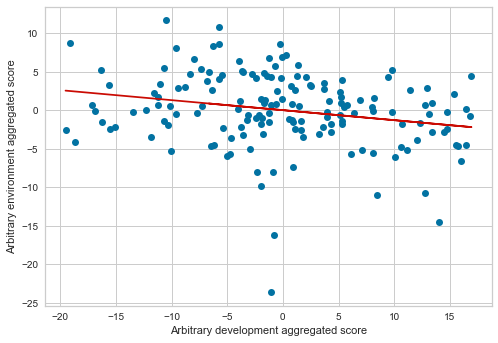

In [ ]:
import matplotlib.pyplot as plt

# Create a linear trendline
coef = np.polyfit(copy['dev'], copy['cli'], 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(copy['dev'], copy['cli'], 'o', copy['dev'], poly1d_fn(copy['dev']), '-r')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

In fact, as assumed, there seems to be a correlation between the development of a country and its negative impact on the enivronement. But there is a large spread in the data as well. Some of the highest developed ccountries have a better environmental score than some of the least developed countries (Remember: This is only valid in my custom feature space and with my custom aggregation - both of which are not scientifically sound). I would have expected a much mor linear correlation with less spread. This migth foreshadow that the clustering will be harder than expected.

To get a feeling for which countries might be most interesting in the sense that they are very developed and still dont have such a negative impact as other, similar developed countries, we zoom into the upper right corner of the plot.

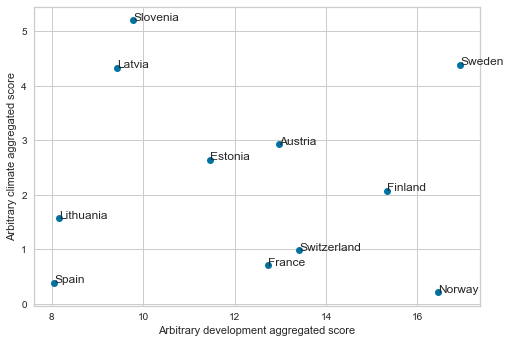

In [ ]:
plt.plot(copy[(copy['dev'] > 8) & (copy['cli'] > 0)]['dev'], copy[(copy['dev'] > 8) & (copy['cli'] > 0)]['cli'], 'o')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

for i, txt in enumerate(copy['country_code']):
    plt.annotate(translate_code_country[txt], (copy['dev'][i], copy['cli'][i]))

And to get a feeling for the developed countries with a disproportionally negative impact on the environment, we zoom into the lower right corner.

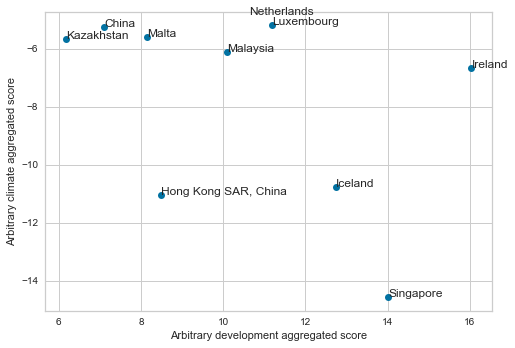

In [ ]:
plt.plot(copy[(copy['dev'] > 5) & (copy['cli'] < -5)]['dev'], copy[(copy['dev'] > 5) & (copy['cli'] < -5)]['cli'], 'o')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

for i, txt in enumerate(copy['country_code']):
    plt.annotate(translate_code_country[txt], (copy['dev'][i], copy['cli'][i]))

Now a brief analysis will be made whether the clustering algorithm k-Means will provide a reasonable clustering on the data. For that, I compute the silhouette score of a clustering for different amounts of clusters. The silhouette score describes whether  clusters are well apart and cleary distinguished.

Text(0.5, 1.0, 'Development - minmax scaler')

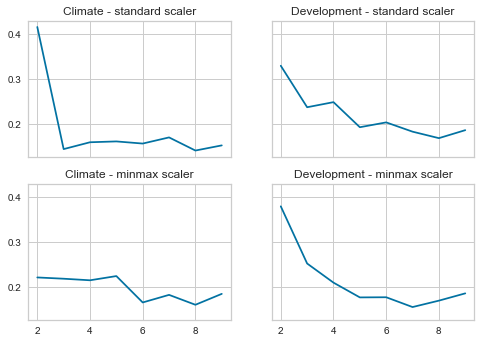

In [ ]:
## K-MEANS CLUSTERING ##

# Environment dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes_cli_std = []
silhouettes_cli_mm = []
silhouettes_dev_std = []
silhouettes_dev_mm = []


for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_cli_sc_std)
    silhouettes_cli_std.append(silhouette_score(df_cli_sc_std, predict))

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_cli_sc_mm)
    silhouettes_cli_mm.append(silhouette_score(df_cli_sc_mm, predict))

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_dev_sc_std)
    silhouettes_dev_std.append(silhouette_score(df_dev_sc_std, predict))
    
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_dev_sc_mm)
    silhouettes_dev_mm.append(silhouette_score(df_dev_sc_mm, predict))


fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')

ax[0,0].plot(range(2,10), silhouettes_cli_std)
ax[0,0].set_title('Environment - standard scaler')

ax[1,0].plot(range(2,10), silhouettes_cli_mm)
ax[1,0].set_title('Environment - minmax scaler')

ax[0,1].plot(range(2,10), silhouettes_dev_std)
ax[0,1].set_title('Development - standard scaler')

ax[1,1].plot(range(2,10), silhouettes_dev_mm)
ax[1,1].set_title('Development - minmax scaler')


This visualization proposes three things about the dataset.  

Firstly, there is apparently not really a k-Means clustered structure in any of the four analyzed datasets. This can be derived by the fact that the silhouettes scores remain very low, only shortly above 0.4, even for the best possible clusterings. This might indicate that there is no very apparent clustered structure in the data or that the clusters are not formed around one central point, as k-Means expects them to be.  
  
Secondly, the highest silhouette scores are found for clusterings with two cluster centers.  
  
And thirdly, the standard-scaled data outperforms the minmax-scaled data on the environment data, while the minmax-scaled outperforms the standard-scaled data on the development data.

I will thus more closely examine k-Means clusterings with k = 2 on the standard-scaled environment data and the minmax scaled development data.

But first, to maybe improve the clustering quality, I will try to reduce the dimensionality of the two datasets that I will do the clustering on. This is done in order to improve the ratio of instances/dimensions which generally is advantegeous for clustering algorithms. So I start a principal component analysis.

In [ ]:
## PCA ##

from sklearn.decomposition import PCA

pca_cli = PCA()
pca_cli_transformed = pca_cli.fit_transform(df_cli_sc_std)
df_cli_pca = pd.DataFrame(pca_cli_transformed, index=df_cli_sc_std.index)
df_cli_pca

,0,1,2,3,4,5,6,7,8,9,10,11
country_code,,,,,,,,,,,,
AFG,-1.095115,-1.459385,-0.913988,-0.192827,1.734085,-1.013766,0.307471,-0.530258,-1.397045,0.471909,0.051196,0.164243
ALB,-1.559667,0.718545,-0.274200,-0.176308,0.599638,-0.225197,0.633194,0.746460,-0.841518,-0.152985,-0.442751,-0.073518
DZA,0.759385,-2.191401,-0.387998,1.001722,-1.212534,-0.023871,-0.318715,0.779125,-0.450347,-1.449614,0.318671,0.012220
ARG,-0.210777,-0.836541,0.345623,-1.354353,-0.268904,0.004577,0.154676,0.411653,-0.442178,-0.351256,-0.179723,0.066101
ARM,-0.970910,-0.844470,0.468042,-0.530006,0.437087,1.137110,-0.112727,-0.487046,-0.264702,-0.297325,0.191021,0.034320
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,-0.336159,1.724259,-0.456054,0.990521,-0.496077,1.780161,0.306020,0.521392,-0.384259,-0.179389,-0.091133,0.090072
VNM,-0.286483,-0.098319,0.280454,0.776492,-0.131125,-0.951239,0.559821,-0.115435,0.104530,0.413781,0.089517,0.372514
YEM,-0.267076,-2.339251,-0.364364,0.274883,0.051392,-0.644626,-0.603423,-0.460445,0.237776,-0.406034,0.030615,0.515677


In [ ]:
pca_dev = PCA()
pca_dev_transformed = pca_dev.fit_transform(df_dev_sc_mm)
df_dev_pca = pd.DataFrame(pca_dev_transformed, index=df_dev_sc_mm.index)
df_dev_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
country_code,,,,,,,,,,,,,,,,,,
AFG,0.822105,0.222076,0.119385,0.076835,0.811540,0.223371,-0.373719,-0.188390,-0.174017,-0.021041,-0.368004,0.047297,-0.078027,0.250506,0.012084,0.165533,0.159118,-0.113605
ALB,-0.415222,0.123485,0.393231,0.110646,-0.010845,0.067203,0.007100,-0.098686,-0.011524,-0.001507,0.096973,0.018432,-0.000416,-0.044428,-0.063185,0.023324,0.053700,0.028588
DZA,-0.172143,0.541373,-0.058019,-0.005088,0.113190,0.137006,0.060786,-0.101415,-0.200499,0.063793,0.091580,0.003544,0.099320,0.002878,-0.064660,-0.089119,0.075677,0.019418
ARG,-0.327911,0.249406,-0.048050,0.244579,-0.056550,-0.337988,-0.193875,0.022006,0.095595,-0.101877,-0.025543,-0.092702,0.035561,-0.051341,-0.058090,-0.008392,-0.026428,0.018833
ARM,-0.185441,0.220741,0.385991,-0.009602,-0.183398,0.064101,0.042437,0.040703,0.090191,-0.023800,-0.028978,0.022557,-0.114849,0.010942,-0.060413,0.041883,0.009748,0.015291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,-0.080425,0.380435,-0.129755,0.213233,0.034374,-0.283424,-0.102059,0.190843,0.172327,-0.010439,-0.149054,-0.093687,-0.089263,-0.043895,-0.007584,-0.049482,-0.018734,-0.015973
VNM,-0.158165,-0.260562,-0.100514,-0.419963,-0.007979,0.133596,-0.182904,0.131913,0.098126,0.022154,-0.136864,-0.035083,-0.080846,-0.098324,0.057909,0.082659,0.019815,0.047771
YEM,0.566172,0.729301,-0.196228,0.437243,0.238292,0.127483,-0.186180,-0.109661,0.102402,-0.030376,0.196859,-0.055941,0.136504,0.018129,0.120137,-0.210662,-0.039783,0.032310


There is a nonzero covariance between all features in both datasets, so there is correlation between the features.

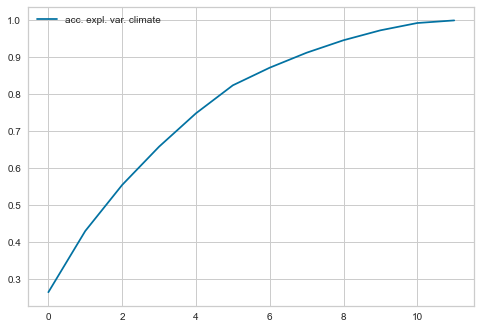

In [ ]:
expl_var = pca_cli.explained_variance_ratio_
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var. environment')
plt.legend()

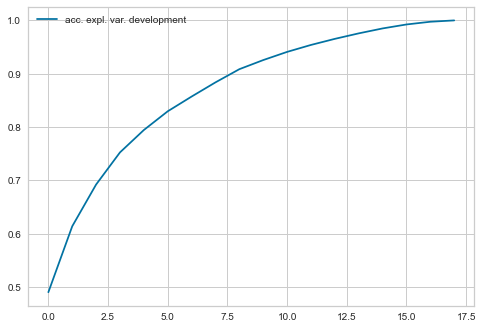

In [ ]:
expl_var = pca_dev.explained_variance_ratio_
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var. development')
plt.legend()

It can be observed in these visualizations, that more than 90 percent of the variability in both datasets can be described through 8/10 internal dimensions (it looks like 7/9, but there is already a dimension at 0 in the plot) in the environment/development dataset. In the following, the k-Means analysis from above is repeated on the transformed datasets.

In [ ]:
df_dev_pca = df_dev_pca.iloc[:, :9]
df_cli_pca = df_cli_pca.iloc[:, :7]

Text(0.5, 1.0, 'Development - without pca')

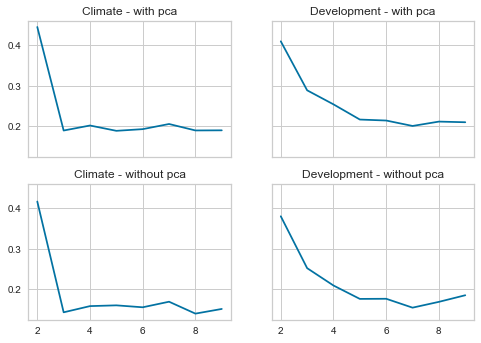

In [ ]:
## K-MEANS CLUSTERING ##

# Environment dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes_cli_pca = []
silhouettes_dev_pca = []


for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_dev_pca)
    silhouettes_dev_pca.append(silhouette_score(df_dev_pca, predict))

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predict = kmeans.fit_predict(df_cli_pca)
    silhouettes_cli_pca.append(silhouette_score(df_cli_pca, predict))

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')

ax[0,0].plot(range(2,10), silhouettes_cli_pca)
ax[0,0].set_title('Environment - with pca')

ax[1,0].plot(range(2,10), silhouettes_cli_std)
ax[1,0].set_title('Environment - without pca')

ax[0,1].plot(range(2,10), silhouettes_dev_pca)
ax[0,1].set_title('Development - with pca')

ax[1,1].plot(range(2,10), silhouettes_dev_mm)
ax[1,1].set_title('Development - without pca')

It can be observed that the PCA ever so slightly improves the clustering. This is very likely to be caused by the missing 10% of varaiability that was removed during the PCA. With that variability missing, it seems like the countries are a little more similar in their behavior and thus a slightly better clustering can be achieved.

With the improved datasets, it could be valuable to look at the silhoutte plots of the k-Means clusterings for k = 2

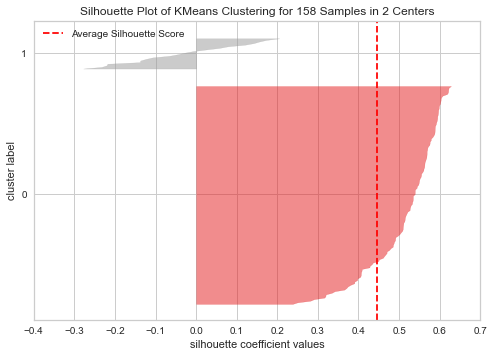

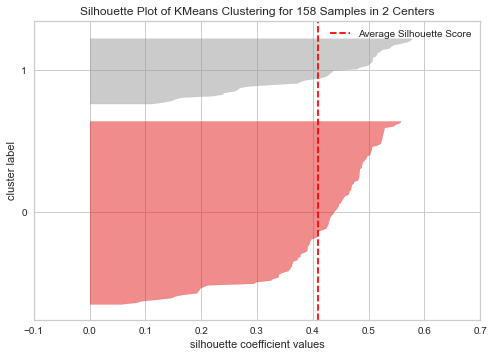

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 158 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_cli_pca)        
visualizer.finalize()
visualizer.show() 

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_dev_pca)        
visualizer.finalize()
visualizer.show() 

When looking at the silhouette plots, two similar, but still in some aspects different situations present themselves.  
For the impact on the environment, one large cluster presents itself with a bad, but somewhat acceptable silhoutte score. And there is a second, smaller cluster, that has an overall negative silhoutte score, so that it cant really be taken as an actual cluster and could maybe be interpreted as noise (as k-Means does not have the option to discard instances as noise). This is defenitly an indiction that k-Means might not be the right algorithm to approach this task as the data might not be clustered around central points.  
For the development, there is still one larger cluster and one smaller cluster, but this time, the smaller cluster is of the same quality as the larger cluster.  
  
To better understand the implications of this visualization I want to further investigate:
- the countrys from the smaller cluster in environmental impact
- the cluster descriptions of the development clusters within the original dimensions

In [ ]:
# Get the names of the countries in the smaller environment k-Means cluster

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
predict_cli = kmeans.fit_predict(df_cli_pca)

for country in df_cli.reset_index()['country_code'][predict_cli == 1]:
    print(translate_code_country[country])

df_cli.loc[:, 'cluster'] = predict_cli

print('Anzahl der Länder in Cluster 0: ' + str(len(df_cli[df_cli['cluster'] == 0])))
print('Anzahl der Länder in Cluster 1: ' + str(len(df_cli[df_cli['cluster'] == 1])))

# Get a description of the environment clusters

df_cli.groupby('cluster').aggregate(['mean'])

Australia
Bahrain
Brunei Darussalam
Canada
Finland
Hong Kong SAR, China
Iceland
Korea, Rep.
Kuwait
Luxembourg
Malaysia
Norway
Oman
Qatar
Russian Federation
Saudi Arabia
Singapore
Trinidad and Tobago
United Arab Emirates
United States
Anzahl der Länder in Cluster 0: 138
Anzahl der Länder in Cluster 1: 20


/Users/timstaubert/.virtualenvs/programming/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Agricultural land (% of land area),Fertilizer consumption (kilograms per hectare of arable land),Forest area (% of land area),CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita),Renewable electricity output (% of total electricity output),Terrestrial and marine protected areas (% of total territorial area),Fossil fuel energy consumption (% of total),Energy use (kg of oil equivalent per capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Total natural resources rents (% of GDP),Population density (people per sq. km of land area)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,
0,43.014334,148.986553,31.167950,3.029505,3107.633661,37.810585,12.521242,67.043334,1873.015973,27.396151,5.346970,144.043296
1,18.659307,611.823811,29.344556,14.718405,13780.926944,18.896202,10.941546,83.899629,7921.841661,27.088085,13.273159,909.052814


These are the countrys from the environment dataset, that did not fit into the larger cluster. It seems to me like they are mostly very and developed countries, which is interesting. We see, that they mostly differ in CO2 emissions, energy use and population desnity. Now a description of the clusters regarding development follows:

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
predict_dev = kmeans.fit_predict(df_dev_pca)

df_dev.loc[:, 'cluster'] = predict_dev

print('Anzahl der Länder in Cluster 0: ' + str(len(df_dev[df_dev['cluster'] == 0])))
print('Anzahl der Länder in Cluster 1: ' + str(len(df_dev[df_dev['cluster'] == 1])))

df_dev.groupby('cluster').aggregate(['mean'])

Anzahl der Länder in Cluster 0: 116
Anzahl der Länder in Cluster 1: 42


/Users/timstaubert/.virtualenvs/programming/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Access to electricity (% of population),"Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",GDP per capita growth (annual %),GDP per capita (current US$),Population ages 15-64 (% of total population),"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Refugee population by country or territory of origin,Population living in slums (% of urban population),High-technology exports (% of manufactured exports),Logistics performance index: Overall (1=low to 5=high),Research and development expenditure (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Strength of legal rights index (0=weak to 12=strong)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,
0,97.574579,13.413706,3.207401,42.708957,1.733256,20783.284378,67.263076,95.745077,50.554981,40.102913,75.961667,54690.607648,8.537931,11.033622,3.103017,1.031705,8.442759,4.738831
1,43.407862,73.523810,10.755807,449.500000,2.765225,1406.277365,55.341998,56.435392,19.802556,43.137989,61.557071,128825.928571,57.000000,6.867783,2.476376,0.901572,6.530476,4.833333


We can see from this clustering that it somehow split the countries into further developed (especially higher access to electricity, GDP per capita and school/university enrollment) and less developed countries. The group of less developed countries is half the size of the group of further developed countries.  

To get a feeling for my data and the clusters in a visual way, I will project my clusterings into the arbitrary two dimensional feature space of aggregated environment and devlopment scores I created earlier.

Text(0.5, 0, 'Arbitrary development aggregated score')

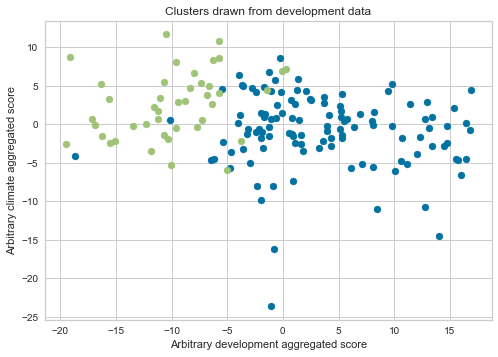

In [ ]:

plt.scatter(copy[predict_dev==0]['dev'], copy[predict_dev==0]['cli'])
plt.scatter(copy[predict_dev==1]['dev'], copy[predict_dev==1]['cli'])

plt.title('Clusters drawn from development data')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

Text(0.5, 0, 'Arbitrary development aggregated score')

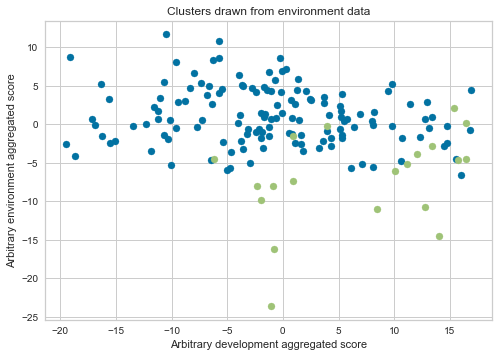

In [157]:
plt.scatter(copy[predict_cli==0]['dev'], copy[predict_cli==0]['cli'])
plt.scatter(copy[predict_cli==1]['dev'], copy[predict_cli==1]['cli'])

plt.title('Clusters drawn from environment data')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

Something that we can see from these comparisions is that indeed, as expected, all countries in the smaller, worse for the environment cluster are also located in the more developed cluster. That is something that seems to slightly validate the initial thesis of this work, that more developed countries are worse for the environment. Additionally these findigs seem to somewhat validate the method of aggregating all variables into one score, as the countries of the less developed cluster all lie towards the lower end of my aggregated development score and all countries from the cluster that is worse for the environment have a more negative aggregated environment score.

Let us now repeat the clustering experiment with density based clustering, as we already had the suspicion, that any clusterings might not satisfy the k-Means requirement of clusters being formed around a central point.

#### Density-based clustering

To identify which hyperparameters I should use in a density clustering, I use the OPTICS method with a neighbourhood of 20 for a point to be a core point. This should be reasonable for the size of the dataset

Text(0.5, 1.0, 'Environment data')

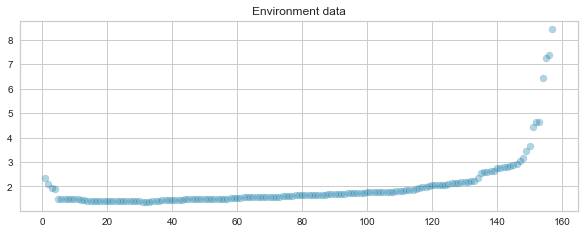

In [158]:
## DENSITY BASED CLUSTERING ##

from sklearn.cluster import OPTICS

# Environment data
optics = OPTICS(min_samples=20)
optics.fit(df_cli_pca)

space = np.arange(len(df_cli_pca))
reachability = optics.reachability_[optics.ordering_]

plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability, alpha=0.3)
plt.title('Environment data')

Text(0.5, 1.0, 'Development data')

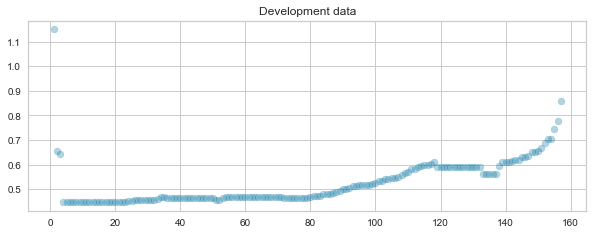

In [ ]:
# Development data
optics = OPTICS(min_samples=20)
optics.fit(df_dev_pca)

space = np.arange(len(df_dev_pca))
reachability = optics.reachability_[optics.ordering_]

plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability, alpha=0.3)
plt.title('Development data')

From these visualizations we see that a density-based clustering algorithm identifies only one cluster in the environment dataset. It does however, with the above described settings detect two clusters within the development dataset (provided you choose the right epsilon, the distance two points can maximally be apart from each other and still be considered to lie within the same neigbhourhood). In both datasets, there are some instances that have a much higher reachabiliy distance and will be considered noise. I will now map the resulting clustering of dbscan into the same two-dimensional space, that I already projected the k-Means clusters into.

[-1  0]


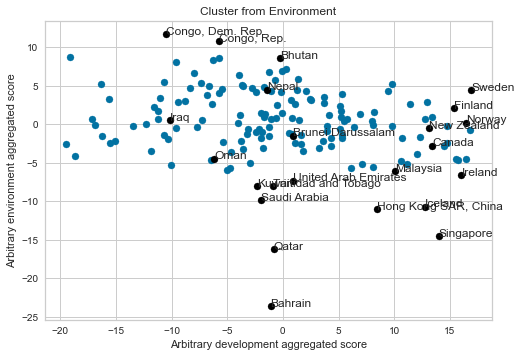

In [159]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=20)
dbscan_clusters = dbscan.fit_predict(df_cli_pca)

copy['climate_cluster'] = dbscan_clusters

print(np.unique(dbscan_clusters))

plt.scatter(copy[dbscan_clusters==0]['dev'], copy[dbscan_clusters==0]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==-1]['dev'], copy[dbscan_clusters==-1]['cli'], label=i, c='black')
plt.title('Cluster from Environment')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

for i, txt in enumerate(copy[dbscan_clusters==-1]['country_code']):
    plt.annotate(translate_code_country[txt], (copy[copy['country_code'] == txt]['dev'], copy[copy['country_code'] == txt]['cli']))

Interestingly, the points that are located towards the edge of the aggregated environment dimension are classified as noise much more frequently than the points that lie more towards the middle of that aggrgated score. This again somehow validates the method of aggregating all the environment dimensions into one score, since this aggregation seems to preserve the relative position of outliers (more towards the edge of group) a bit. Also we see that on the upper edge of the development score, countries are much more likely to be classified as noise than on the lower scale. This indicates that the influence on the environment from developed countries has a huge variance, while the influence of less developed countries on the environment is more similar (at least in absolute terms). That is something we aleady detected with the k-Means algorithm, where we found a small and very bad clustering that also included many of the countries that are considered noise here.
  
But maybe the countries that have now been classified as noise do in fact form a cluster, but a smaller one, that does not get picked up on by the minimum neigbourhood size of 20 for a point to be a core point that I selected. So I will see what happens when we make that smaller.

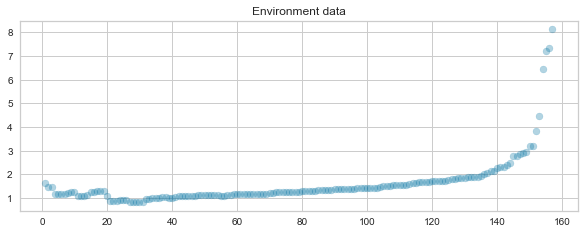

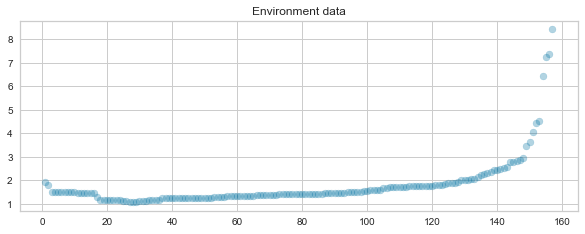

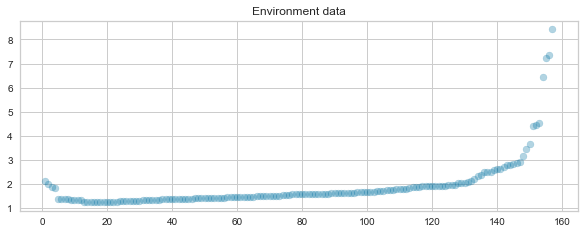

In [162]:
## DENSITY BASED CLUSTERING ##

from sklearn.cluster import OPTICS

for i in [5, 10, 15]:
    # Environment data
    optics = OPTICS(min_samples=i)
    optics.fit(df_cli_pca)

    space = np.arange(len(df_cli_pca))
    reachability = optics.reachability_[optics.ordering_]

    plt.figure(figsize=(10, 3.5))
    plt.scatter(space, reachability, alpha=0.3)
    plt.title('Environment data')

Since we dont see multiple 'valleys' even in the first plot, it seems like the countries the algorithm identified as outliers do not form a smaller cluster and only share the property of not beeing similar to the one identified cluster.

But now, let us look at the development data, where we already saw that two clusters will form when we choose the right epsilon.

[-1  0  1]


Text(0.5, 0, 'Arbitrary development aggregated score')

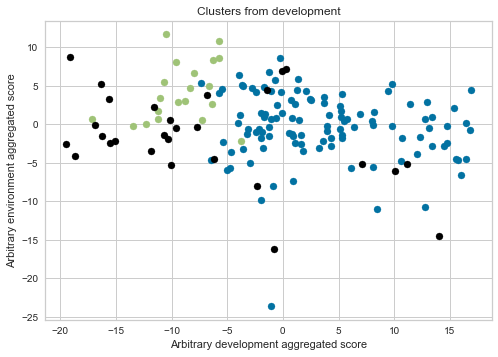

In [160]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.58, min_samples=20)
dbscan_clusters = dbscan.fit_predict(df_dev_pca)

copy['development_cluster'] = dbscan_clusters

# Looking at the number of detected clusters
print(np.unique(dbscan_clusters))

plt.scatter(copy[dbscan_clusters==0]['dev'], copy[dbscan_clusters==0]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==1]['dev'], copy[dbscan_clusters==1]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==-1]['dev'], copy[dbscan_clusters==-1]['cli'], label=i, c='black')

plt.title('Clusters from development')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

This plot suggests that the density based clusteirng that led to two clusters being formed splits the countries into more developed and less developed countries, with the cluster of more developed countries being larger. This is very similar to the clustering that the k-Means algorithm found earlier on. Additionally, the countries that get discarded as noise from the algorithm lie towards the lower end of the development scale much more frequently. This migth indicate that some of the least developed countries face different issues as their development is concerned.  
  
Again I would now like to see whether the clustering would be different for smaller neighbourhood sizes.

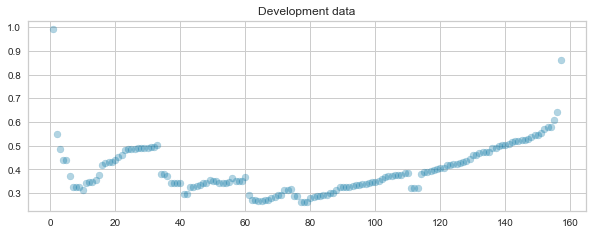

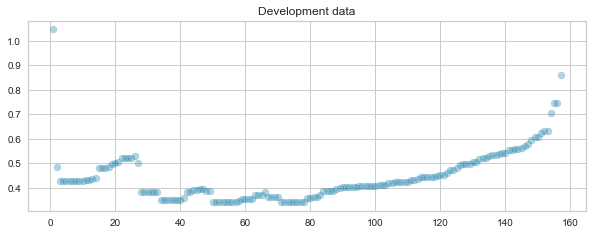

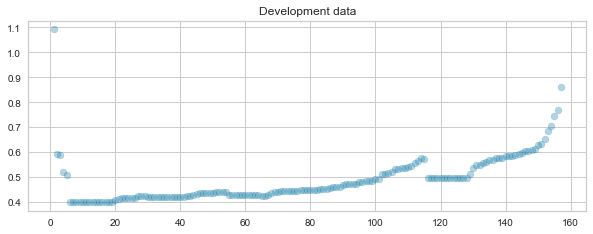

In [163]:
## DENSITY BASED CLUSTERING ##

from sklearn.cluster import OPTICS

for i in [5, 10, 15]:
    # Environment data
    optics = OPTICS(min_samples=i)
    optics.fit(df_dev_pca)

    space = np.arange(len(df_cli_pca))
    reachability = optics.reachability_[optics.ordering_]

    plt.figure(figsize=(10, 3.5))
    plt.scatter(space, reachability, alpha=0.3)
    plt.title('Development data')

There migth be some more valuable clustering information for epsilon = 0.35 and min_samples = 5

[-1  0  1  2  3  4]


Text(0.5, 0, 'Arbitrary development aggregated score')

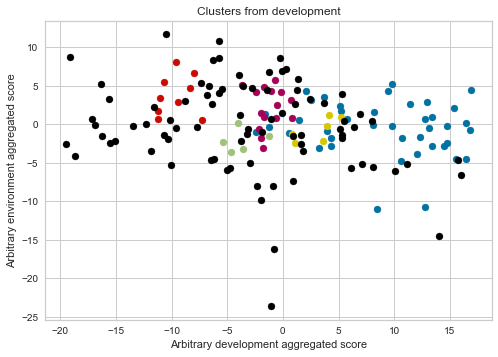

In [170]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_dev_pca)

copy['development_cluster'] = dbscan_clusters

# Looking at the number of detected clusters
print(np.unique(dbscan_clusters))

plt.scatter(copy[dbscan_clusters==0]['dev'], copy[dbscan_clusters==0]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==1]['dev'], copy[dbscan_clusters==1]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==2]['dev'], copy[dbscan_clusters==2]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==3]['dev'], copy[dbscan_clusters==3]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==4]['dev'], copy[dbscan_clusters==4]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==-1]['dev'], copy[dbscan_clusters==-1]['cli'], label=i, c='black')

plt.title('Clusters from development')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

This clustering discards many of the countries as noise, especially towards thew middle and lower end of the development axis. But none of the countries identified as noise before belong to a cluster now, so it seemingly is true that they face their individual problems with development and individual measures would have to be taken to help them .

Without the 'noise' countries the clustering looks as follows:

Text(0.5, 0, 'Arbitrary development aggregated score')

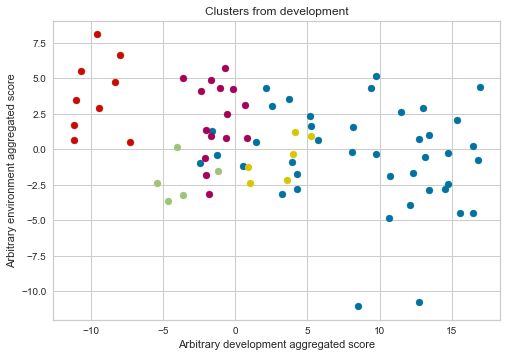

In [167]:
plt.scatter(copy[dbscan_clusters==0]['dev'], copy[dbscan_clusters==0]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==1]['dev'], copy[dbscan_clusters==1]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==2]['dev'], copy[dbscan_clusters==2]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==3]['dev'], copy[dbscan_clusters==3]['cli'], label=i)
plt.scatter(copy[dbscan_clusters==4]['dev'], copy[dbscan_clusters==4]['cli'], label=i)

plt.title('Clusters from development')
plt.ylabel("Arbitrary environment aggregated score")
plt.xlabel("Arbitrary development aggregated score")

It would take a domain expert to figure out whether this clusterting provides any value and indicates similar countries. From a purely visually perspective, within my aggregated 2 dimensional vector space, the clustering seems to do a good job at identififying similar countries.

To get a feeling for where on the world the clusters from the dbscan experiment with epsilon = 0.58 and min_samples 20 and its noise are located, I will briefly project them onto a world map.

In [169]:
import folium
import geopandas

dbscan = DBSCAN(eps=0.58, min_samples=20)
dbscan_clusters = dbscan.fit_predict(df_dev_pca)

copy['development_cluster'] = dbscan_clusters

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the two DataFrames together
table = world.merge(copy, how="inner", left_on=['iso_a3'], right_on=['country_code'])

# Create a map
my_map = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['name', 'development_cluster'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Development clusters'
).add_to(my_map)
my_map

In this visualization the colors describe the following:  

- White: no data availabe
- Orange: the more developed cluster
- Light yellow: noise
- Red: the less developed cluster

What this map shows is the sad but seemingly true situation, that all of the less developed countries (according to my clustering in my feature space) are located in Africa. And all of the countries that where classified as noise (which we also related to less development before) are located in Africa and South Asia.

## Conclusions

The aim of this work was to identfy how the environmental impact differs with the development of countries. All results that I have gotten rely on an unscientifically chosen set of features, so they have to be taken with care, altough they seem to reflect the common-sense situation. I found that there seems to be some correlation of development and negative impact on the environment. But this correlation is of much more comlex nature than I initially thought, as the most developed countries seem to have a very high variance in their impact on the environment.  
  
Another thing that was observed is that most of the least developed countries also have a high variance in their development, which indicates that they do not all have the same problem and individual solutions would have to be found to help them. And lastly I have found that there is a strong inidcation that the African and South Asian region are, on average, less developed than the rest of the world.
  
Building on these results, domain experts could discuss the used feature space and improve similar works through a better selection of features. Also, a closer look at the clustering of countries regarding their development could help to identify countries that would profit from the same development aid measures. If none of the above, the results of this work aim to remind myself of the strong differences that exist in worldwide development and the injustices that are connected to this.